# [Image Alignment in details](https://learnopencv.com/image-alignment-feature-based-using-opencv-c-python/)
**Satya Mallick, LearnOpenCV.com**


## Align an image to a template.
![alt text](image-alignment-using-opencv.jpg "Image Alignment")

## Theory

1. A **Homography** transforms a square to arbitrary quad. 

![alt text](motion-models.jpg "Motion Models")






## Theory
2. Images of two planes are related by a **Homography**
3. We need **4 corresponding points** to estimate Homography


!["Homography Example"](homography-example.jpg)|

In [2]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Algorithm
- Take the query image and convert it to grayscale. 
- Now Initialize the ORB detector and detect the keypoints in query image and scene. 
- Compute the descriptors belonging to both the images. 
- Match the keypoints.
- Show the matched images.

## Step 1: Read Tempalate and Scanned Image

In [3]:
# Read reference image
refFilename = "form.jpg"
print("Reading reference image : ", refFilename)
im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# Read image to be aligned
imFilename = "scanned-form.jpg"
print("Reading image to align : ", imFilename)
im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
  

Reading reference image :  form.jpg
Reading image to align :  scanned-form.jpg


Text(0.5, 1.0, 'Scanned Form')

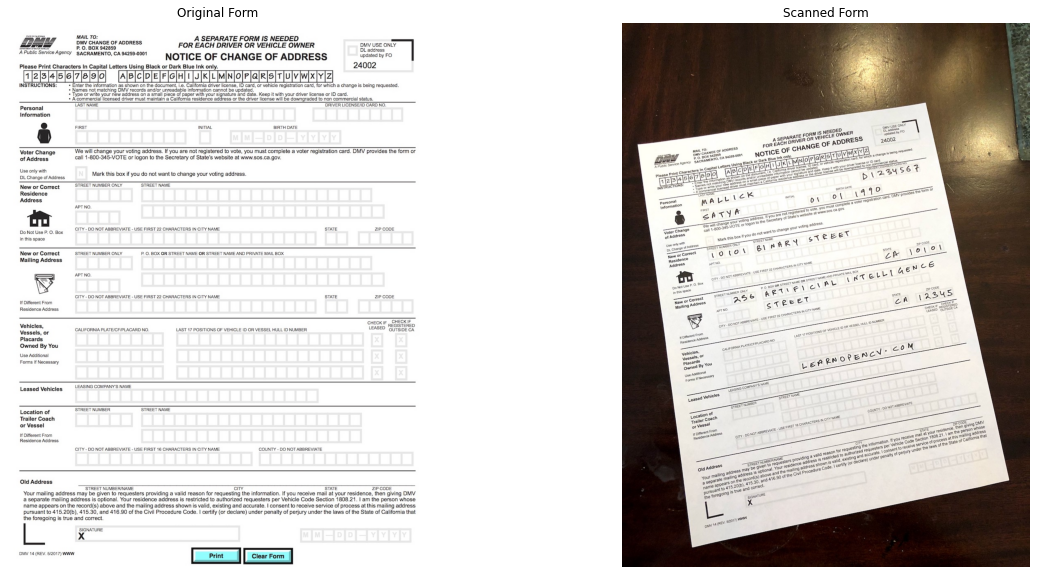

In [4]:
# Display Images

plt.figure(figsize=[20,10]); 
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned Form")

## Step 2: Find keypoints in both Images

Think of keypoints as corner points that are stable under image transformations

In [9]:
# Convert images to grayscale

im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
  

# Detect ORB features and compute descriptors.[ORB (Oriented FAST and Rotated BRIEF)]
MAX_NUM_FEATURES = 700
orb = cv2.ORB_create(MAX_NUM_FEATURES) # create ORB object
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None) # detect the keypoints and compute descriptor
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

# Display 
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]), color=(255, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]), color=(255, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Docstring: should always use shortcut ctrl+tab to see docstring
# drawKeypoints(image, keypoints, outImage[, color[, flags]]) -> outImage
# .   @brief Draws keypoints.
# .   
# .   @param image Source image.
# .   @param keypoints Keypoints from the source image.
# .   @param outImage Output image. Its content depends on the flags value defining what is drawn in the
# .   output image. See possible flags bit values below.
# .   @param color Color of keypoints.
# .   @param flags Flags setting drawing features. Possible flags bit values are defined by
# .   DrawMatchesFlags. See details above in drawMatches .
# .   
# .   @note
# .   For Python API, flags are modified as cv.DRAW_MATCHES_FLAGS_DEFAULT,
# .   cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, cv.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG,
# .   cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS
# Type:      builtin_function_or_method

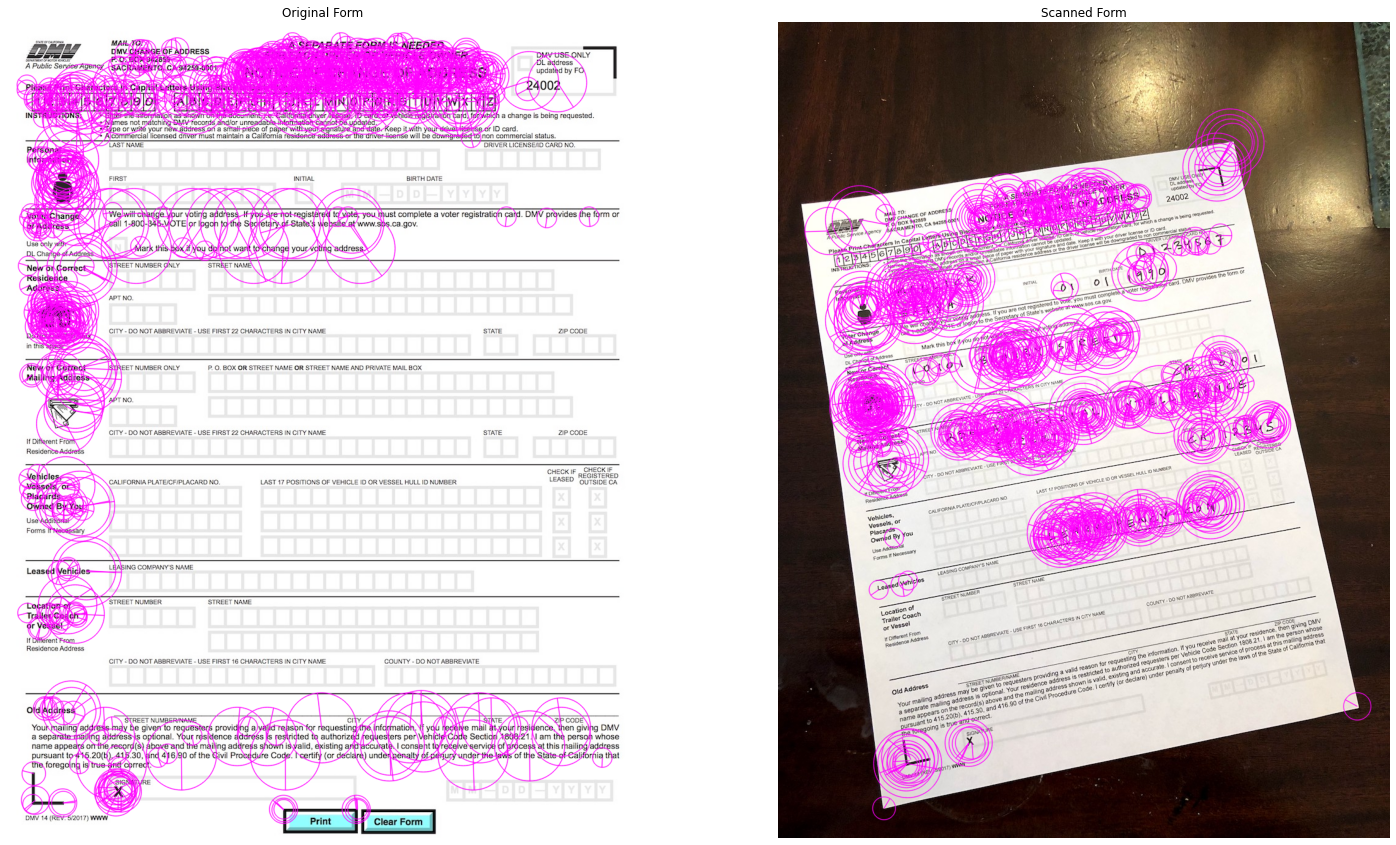

In [8]:
plt.figure(figsize=[25,15])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

## Step 3 : Match keypoints in the two image

In [16]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
#DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
matches = list(matcher.match(descriptors1, descriptors2, None))
  
# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

print(len(matches))
# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]


700


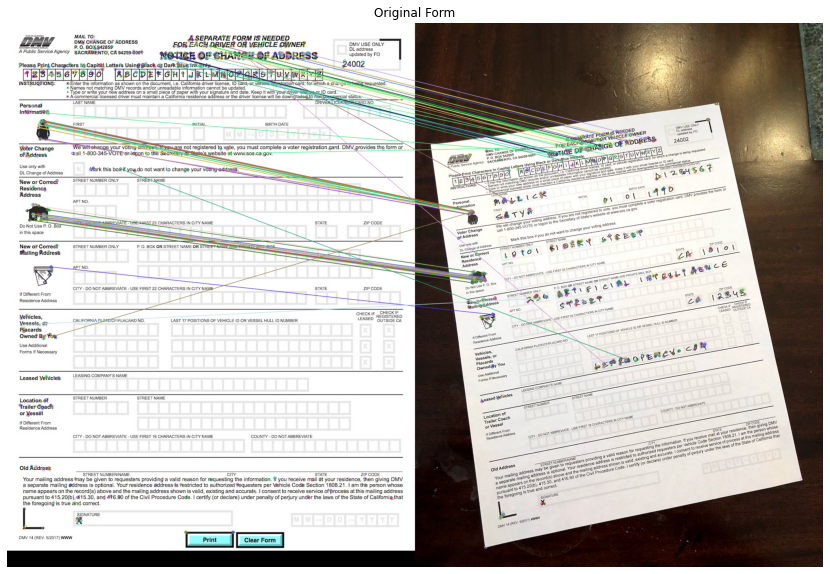

In [17]:
# Draw top matches
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40,10])
plt.imshow(im_matches); plt.axis('off'); plt.title("Original Form");


## Step 4:  Find Homography



In [18]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt
  
# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

## Step 5: Warp image

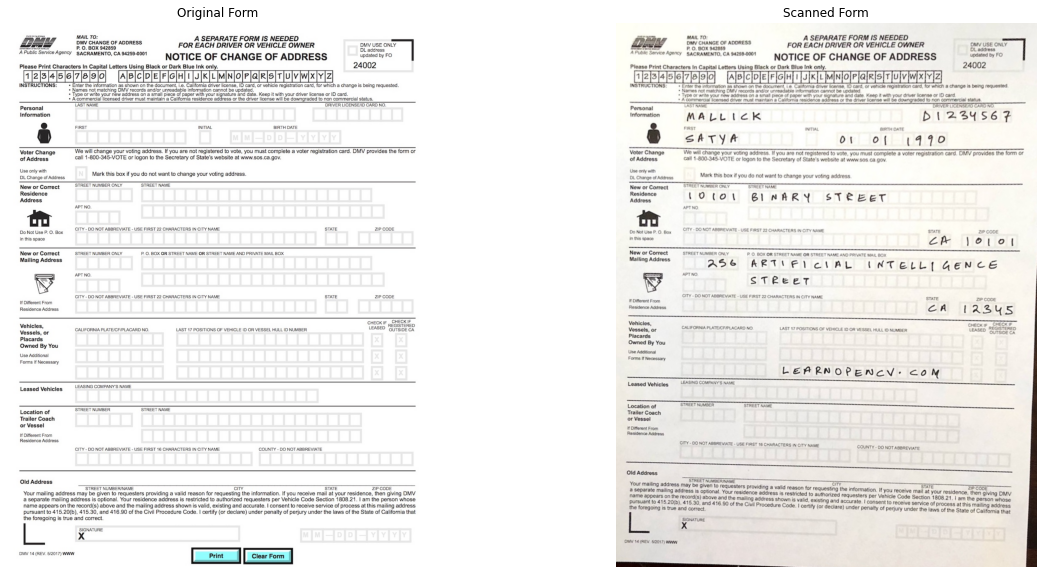

In [19]:
# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))
# Display results 
plt.figure(figsize=[20,10]); 
plt.subplot(121); plt.imshow(im1); plt.axis('off'); plt.title("Original Form");
plt.subplot(122); plt.imshow(im2_reg); plt.axis('off'); plt.title("Scanned Form");

### Basics of Brute-Force Matcher

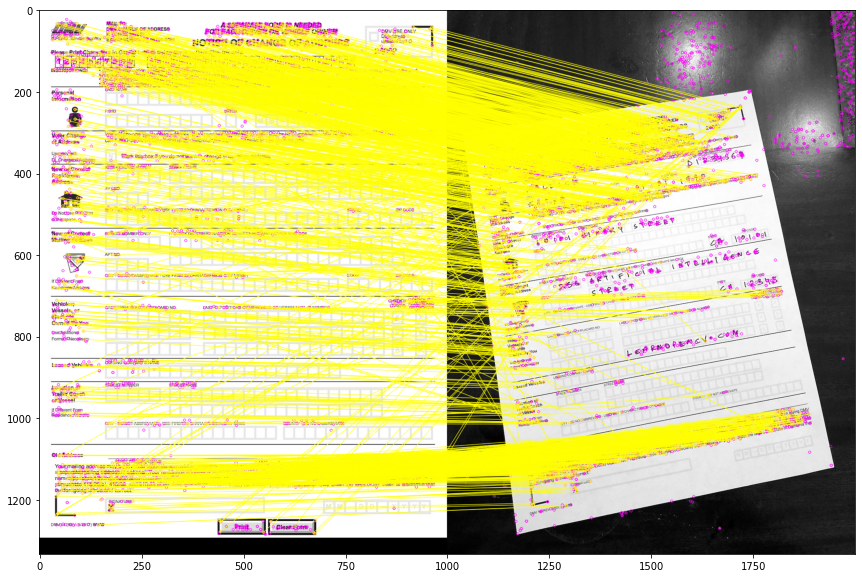

(<matplotlib.image.AxesImage at 0x7f3b0c5ce6b0>, None)

In [27]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)


FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2



import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('form.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('scanned-form.jpg',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = list(flann.knnMatch(des1,des2,k=2))

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        
draw_params = dict(matchColor = (255,255,0),
                   singlePointColor = (255,0,255),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.figure(figsize=[20,10]); 
plt.imshow(img3,),plt.show()
